# Pytorch Computer vision

In [12]:
## import libraries
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [13]:
torch.set_grad_enabled(True)
torch.set_printoptions(linewidth=120)

In [14]:
import numpy as np
import pandas as np
import matplotlib.pyplot as plt

In [15]:
from sklearn.metrics import confusion_matrix
#from plotcm import plot_confusion_matrix

import pdb

## Hyperparameters
In general, hyperparameters are parameters whose values are chosen manually and arbitrarily.
- kernel_size -> Sets the filter size
- out_channels -> sets the number of filters. One filter produces one output channel
- out_features -> sets the size of the output tensor

### Initializating the model architecture by defining Network  class and instructions for forward pass

In [27]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        # (1) input layer
        t = t
        
        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)
        
        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)
        
        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)
        
        return t

## Downloading data from torchvision

In [28]:
train_set = torchvision.datasets.FashionMNIST(root='./data/FashionMNIST', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

### PyTorch DataLoader class for loading our data and initiating for the Forward Class

In [29]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
batch = next(iter(train_loader)) # Getting a batch 
images, labels = batch

## Build the model & Calculating the loss

In [30]:
preds = network(images)
loss = F.cross_entropy(preds, labels) # Calculating the loss
 
loss.item()
 
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()
 
get_num_correct(preds, labels)
#Calculating the Gradients
network.conv1.weight.grad
 
loss.backward() 
 
network.conv1.weight.grad.shape
 
#Updating the Weights
optimizer = optim.Adam(network.parameters(), lr=0.01)
optimizer.step() # Updating the weights
 
preds = network(images)
loss.item()

2.296382188796997

## Training on Single batch
- Calculating the loss
- Calculating the Gradients
- Updating the Weights
- Retraining

In [31]:
# Train using a Single Batch
network = Network()

train_loader= torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

batch = next(iter(train_loader)) # Get Batch
images, labes = batch

preds = network(images) # Pass Batch
loss = F.cross_entropy(preds,labels) # Calcualte Loss

loss.backward() # Calcualte Gradients
optimizer.step() # Update Weights

print('loss1', loss.item())
preds = network(images)
loss = F.cross_entropy(preds, labels)
print('loss2', loss.item())

loss1 2.3035035133361816
loss2 2.2850723266601562


## Training with all batches (= One Epoch)
Running it in a loop instead of doing single batch-wise.

We have 60,000 samples in our training set, we will have 60,000 / 100 = 600 iterations done in one go.

In [33]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

total_loss = 0
total_correct = 0

for batch in train_loader: # Get Batch
    images, labels = batch
    
    preds = network(images) # Pass Batch
    loss = F.cross_entropy(preds, labels) # Calculate Loss
    
    optimizer.zero_grad()
    loss.backward() # Calculate Gradients
    optimizer.step() # Update Weights
    
    total_loss += loss.item()
    total_correct += get_num_correct(preds, labels)
    
    print('epoch', 0,'total_correct', total_correct, 'loss', total_loss)

epoch 0 total_correct 12 loss 2.3045852184295654
epoch 0 total_correct 29 loss 4.609492063522339
epoch 0 total_correct 37 loss 6.921223163604736
epoch 0 total_correct 48 loss 9.197723627090454
epoch 0 total_correct 82 loss 11.470454454421997
epoch 0 total_correct 112 loss 13.644133806228638
epoch 0 total_correct 137 loss 15.798905611038208
epoch 0 total_correct 166 loss 17.689295768737793
epoch 0 total_correct 190 loss 19.441208481788635
epoch 0 total_correct 237 loss 21.065465331077576
epoch 0 total_correct 280 loss 22.557215690612793
epoch 0 total_correct 322 loss 23.963114619255066
epoch 0 total_correct 364 loss 25.281667947769165
epoch 0 total_correct 409 loss 26.6633780002594
epoch 0 total_correct 456 loss 27.886402010917664
epoch 0 total_correct 500 loss 28.977156400680542
epoch 0 total_correct 558 loss 30.174532294273376
epoch 0 total_correct 616 loss 31.320457458496094
epoch 0 total_correct 676 loss 32.56130528450012
epoch 0 total_correct 727 loss 33.75923430919647
epoch 0 tota

epoch 0 total_correct 11485 loss 134.15859681367874
epoch 0 total_correct 11563 loss 134.75472849607468
epoch 0 total_correct 11632 loss 135.35916078090668
epoch 0 total_correct 11715 loss 135.79052305221558
epoch 0 total_correct 11794 loss 136.31479728221893
epoch 0 total_correct 11881 loss 136.7648843228817
epoch 0 total_correct 11952 loss 137.66794553399086
epoch 0 total_correct 12030 loss 138.30984982848167
epoch 0 total_correct 12107 loss 138.8055135011673
epoch 0 total_correct 12184 loss 139.4591542482376
epoch 0 total_correct 12257 loss 140.18782156705856
epoch 0 total_correct 12336 loss 140.72853058576584
epoch 0 total_correct 12413 loss 141.2658441066742
epoch 0 total_correct 12490 loss 141.7896334528923
epoch 0 total_correct 12561 loss 142.58315432071686
epoch 0 total_correct 12638 loss 143.13340389728546
epoch 0 total_correct 12716 loss 143.71399664878845
epoch 0 total_correct 12796 loss 144.29335695505142
epoch 0 total_correct 12876 loss 144.8444300889969
epoch 0 total_corr

epoch 0 total_correct 24508 loss 215.4269943833351
epoch 0 total_correct 24592 loss 215.82733163237572
epoch 0 total_correct 24672 loss 216.2846142053604
epoch 0 total_correct 24758 loss 216.6587012410164
epoch 0 total_correct 24845 loss 217.03056997060776
epoch 0 total_correct 24930 loss 217.48648837208748
epoch 0 total_correct 25017 loss 217.84946957230568
epoch 0 total_correct 25100 loss 218.29256504774094
epoch 0 total_correct 25178 loss 218.83591675758362
epoch 0 total_correct 25260 loss 219.22198620438576
epoch 0 total_correct 25343 loss 219.73192194104195
epoch 0 total_correct 25428 loss 220.10056826472282
epoch 0 total_correct 25513 loss 220.6322029531002
epoch 0 total_correct 25597 loss 221.06967648863792
epoch 0 total_correct 25683 loss 221.47179648280144
epoch 0 total_correct 25771 loss 221.843230843544
epoch 0 total_correct 25860 loss 222.26824113726616
epoch 0 total_correct 25952 loss 222.5710664987564
epoch 0 total_correct 26038 loss 222.93089786171913
epoch 0 total_corre

epoch 0 total_correct 38061 loss 285.9476607441902
epoch 0 total_correct 38149 loss 286.29255267977715
epoch 0 total_correct 38231 loss 286.73537388443947
epoch 0 total_correct 38317 loss 287.10770931839943
epoch 0 total_correct 38406 loss 287.43810200691223
epoch 0 total_correct 38492 loss 287.8078274130821
epoch 0 total_correct 38577 loss 288.23042380809784
epoch 0 total_correct 38663 loss 288.63942074775696
epoch 0 total_correct 38746 loss 289.0574016571045
epoch 0 total_correct 38832 loss 289.53964960575104
epoch 0 total_correct 38914 loss 290.0403752923012
epoch 0 total_correct 39000 loss 290.5039122700691
epoch 0 total_correct 39080 loss 291.1184598207474
epoch 0 total_correct 39166 loss 291.51840138435364
epoch 0 total_correct 39251 loss 291.97900995612144
epoch 0 total_correct 39331 loss 292.50002720952034
epoch 0 total_correct 39418 loss 292.85635673999786
epoch 0 total_correct 39501 loss 293.30700981616974
epoch 0 total_correct 39581 loss 293.70795890688896
epoch 0 total_corr

## Training with multiple epochs for reducing errors and have better predictions

In [35]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

for epoch in range(10):
    total_loss = 0
    total_correct = 0
    
    for batch in train_loader: #Get Batch
        images, labels = batch
        
        preds = network(images) # Pass batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss
        
        optimizer.zero_grad()
        loss.backward() # Calcualte Gradients
        optimizer.step() # Update Weights
        
        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)
        
    print(
    "epoch", epoch, 
    "total_correct:", total_correct, 
    "loss:", total_loss
)

epoch 0 total_correct: 46934 loss: 346.40700486302376
epoch 1 total_correct: 51249 loss: 238.1019562780857
epoch 2 total_correct: 52070 loss: 217.33689792454243
epoch 3 total_correct: 52383 loss: 205.19101737439632
epoch 4 total_correct: 52504 loss: 202.0629768818617
epoch 5 total_correct: 52862 loss: 195.6518995910883
epoch 6 total_correct: 53059 loss: 190.86754819005728
epoch 7 total_correct: 53021 loss: 189.80670823156834
epoch 8 total_correct: 53220 loss: 186.14311645179987
epoch 9 total_correct: 53101 loss: 186.18619421869516


## Creating a Function to get Predictions for ALL Samples

In [36]:
@torch.no_grad()
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    for batch in loader:
        images, labels = batch
 
        preds = model(images)
        all_preds = torch.cat(
            (all_preds, preds)
            ,dim=0
        )
    return all_preds

with torch.no_grad():
    prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=10000)
    train_preds = get_all_preds(network, prediction_loader)

preds_correct = get_num_correct(train_preds, train_set.targets)
 
print('total correct:', preds_correct)
print('accuracy:', preds_correct / len(train_set))

total correct: 53162
accuracy: 0.8860333333333333


## Building the Confusion Matrix

In [37]:
train_set.targets
train_preds.argmax(dim=1)

stacked = torch.stack(
    (
        train_set.targets
        ,train_preds.argmax(dim=1)
    )
    ,dim=1
)
 
stacked.shape

cmt = torch.zeros(10,10, dtype=torch.int64)
cmt

for p in stacked:
    tl, pl = p.tolist()
    cmt[tl, pl] = cmt[tl, pl] + 1

cmt

tensor([[5530,    1,   61,  114,    8,    0,  273,    0,   13,    0],
        [  15, 5859,    0,  112,    5,    0,    5,    0,    4,    0],
        [ 141,    2, 4107,   69, 1081,    1,  590,    0,    9,    0],
        [ 189,    7,    5, 5547,  149,    0,   98,    0,    5,    0],
        [   9,    2,  143,  224, 5344,    0,  266,    0,   12,    0],
        [   6,    2,    0,    7,    0, 5858,    1,   75,   15,   36],
        [1312,    4,  304,  148,  641,    0, 3551,    0,   40,    0],
        [   0,    0,    0,    1,    0,   89,    0, 5733,    5,  172],
        [  37,    1,   10,   26,   20,    5,   58,    2, 5841,    0],
        [   0,    0,    0,    2,    0,   48,    0,  153,    5, 5792]])

## Plotting confusion matrix

Confusion matrix, without normalization
tensor([[5530,    1,   61,  114,    8,    0,  273,    0,   13,    0],
        [  15, 5859,    0,  112,    5,    0,    5,    0,    4,    0],
        [ 141,    2, 4107,   69, 1081,    1,  590,    0,    9,    0],
        [ 189,    7,    5, 5547,  149,    0,   98,    0,    5,    0],
        [   9,    2,  143,  224, 5344,    0,  266,    0,   12,    0],
        [   6,    2,    0,    7,    0, 5858,    1,   75,   15,   36],
        [1312,    4,  304,  148,  641,    0, 3551,    0,   40,    0],
        [   0,    0,    0,    1,    0,   89,    0, 5733,    5,  172],
        [  37,    1,   10,   26,   20,    5,   58,    2, 5841,    0],
        [   0,    0,    0,    2,    0,   48,    0,  153,    5, 5792]])


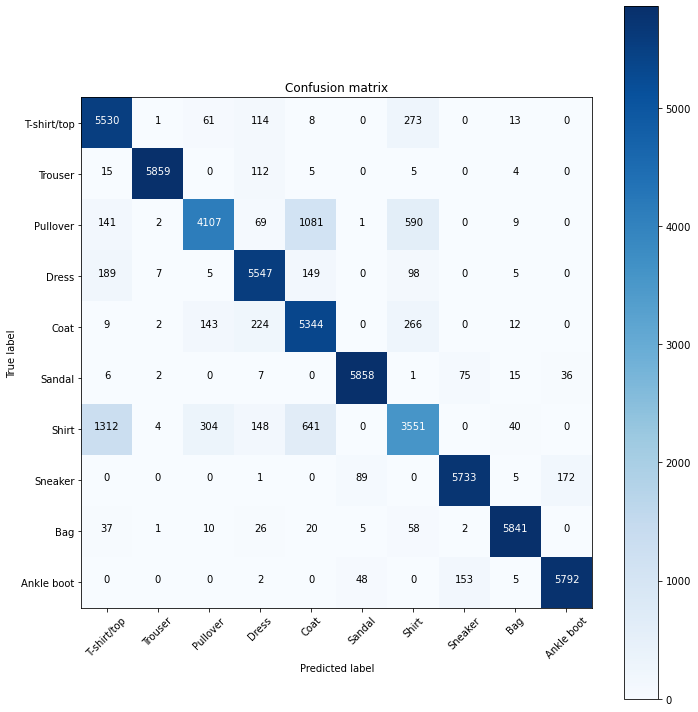

In [38]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
 
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


names = (
    'T-shirt/top'
    ,'Trouser'
    ,'Pullover'
    ,'Dress'
    ,'Coat'
    ,'Sandal'
    ,'Shirt'
    ,'Sneaker'
    ,'Bag'
    ,'Ankle boot'
)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cmt, names)